In [17]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [27]:
pd.set_option('display.max_columns', 500)

In [3]:
%ls

both-tabs-and-commas-screencap.png      nyc_buildings.csv
data-munging.ipynb                      nyc_pluto.csv
data-scribbles.ipynb                    nyc_rolling_sales.csv
data-visualization.ipynb                rolling-sales-data-excel-screencap.png
nyc_building_sales.csv


In [11]:
pluto = pd.read_csv('nyc_pluto.csv', index_col=0)

/Users/Honors/anaconda/envs/nyc-buildings/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (16,17,19,20,21,22,28,63,64,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
pluto.head(5)

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
0,Manhattan,1.0,10.0,101.0,5.0,1018.0,2.0,1.0,10004.0,E007,1.0,8100.0,1 GOVERNORS ISLAND,R3-2,NaN,NaN,NaN,NaN,NaN,GI,NaN,NaN,R3-2/GI,NaN,N,Y4,8.0,0,P,GOVERNORS ISLAND CORP,7736692.0,2725731.0,2725731.0,0.0,0.0,0.0,0.0,0.0,0.0,2725731.0,7.0,183.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,N,5.0,5.0,104445450.0,151952400.0,104445450.0,151952400.0,1900.0,E,0.0,0.0,Governors Island,NaN,0.35,0.6,0.0,1.0,1.0,1.000010e+09,0.0,5.0,979071.0,190225.0,16a,Y,199 999,10101.0,NaN,0.0,NaN,1.0,15v1
1,Manhattan,1.0,101.0,101.0,1.0,1001.0,2.0,1.0,10004.0,E007,1.0,8200.0,1 LIBERTY ISLAND,R3-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R3-2,NaN,N,P7,8.0,0,X,U S GOVT LAND & BLDGS,541886.0,541886.0,541886.0,0.0,0.0,0.0,0.0,0.0,0.0,541886.0,7.0,10.0,0.0,0.0,0.0,500.0,1046.0,0.0,0.0,NaN,0.0,Y,5.0,5.0,4225950.0,11523150.0,4225950.0,11523150.0,1900.0,E,0.0,0.0,NaN,STATUE OF LIBERTY NATIONAL MONUMENT,1.00,0.6,0.0,1.0,1.0,1.000010e+09,0.0,1.0,971677.0,190636.0,16a,Y,199 999,10101.0,NaN,0.0,NaN,1.0,15v1
2,Manhattan,1.0,201.0,101.0,1.0,1000.0,2.0,1.0,10004.0,E007,1.0,8200.0,1 ELLIS ISLAND,R3-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R3-2,NaN,N,Z9,NaN,0,X,U S GOVT LAND & BLDGS,2764190.0,603130.0,603130.0,0.0,0.0,0.0,0.0,0.0,0.0,603130.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,N,5.0,5.0,14972400.0,105291900.0,14972400.0,105291900.0,1900.0,E,0.0,0.0,Ellis Island,NaN,0.22,0.6,0.0,1.0,1.0,1.000010e+09,0.0,1.0,972790.0,193648.0,12b,NaN,199 999,10101.0,NaN,0.0,NaN,1.0,15v1
3,Manhattan,1.0,301.0,101.0,NaN,NaN,2.0,1.0,10004.0,E007,1.0,NaN,JOE DIMAGGIO HIGHWAY,ZNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZNA,NaN,N,U0,7.0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,N,0.0,5.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.00,0.0,0.0,0.0,1.0,1.000010e+09,0.0,0.0,NaN,NaN,12b,NaN,199 999,10101.0,NaN,0.0,NaN,4.0,15v1
4,Manhattan,1.0,401.0,101.0,NaN,NaN,2.0,1.0,10004.0,E007,1.0,NaN,JOE DIMAGGIO HIGHWAY,ZNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZNA,NaN,N,U0,7.0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,N,0.0,5.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.00,0.0,0.0,0.0,1.0,1.000010e+09,0.0,0.0,NaN,NaN,12b,NaN,1 99 999,10101.0,NaN,0.0,NaN,4.0,15v1


# Borough

This one is easy.

In [13]:
pluto['Borough'].value_counts()

Queens           324630
Brooklyn         277748
Staten Island    123892
Bronx             89963
Manhattan         43231
Name: Borough, dtype: int64

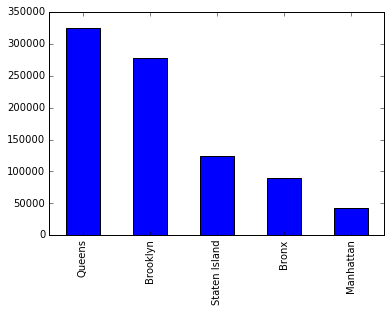

In [14]:
pluto['Borough'].value_counts().plot(kind='bar')

Not that many addresses in Manhattan! Remember: the other boroughs have more people and (significantly) smaller buildings, so this makes sense; still, the scale of the difference is surprising.

Brooklyn has significantly fewer properties than Queens, providing a little bit of credence to the well-known supposition that residents of Queens, which also has (for now) a slightly smaller population, face easier housing pressure than Brooklyn is.

Interestingly enough, the Bronx has fewer identifiable pieces of property than Staten Island, which comes as a surprise, as Staten Island has significantly fewer people. But this also means that there is more land for those people to own, and Staten Island does have a higher land area than the Bronx.

If we divide each borough's land area by the number of properties to get a "property density" we can get a finer handle on these differences.

# Block, Lot

In [18]:
# Integrity check: this ought to evaluate to 1, as we expect 'Borough', 'Block', 'Lot' to be a unique key.
np.max(pluto.groupby(['Borough', 'Block', 'Lot']).count().values)

1

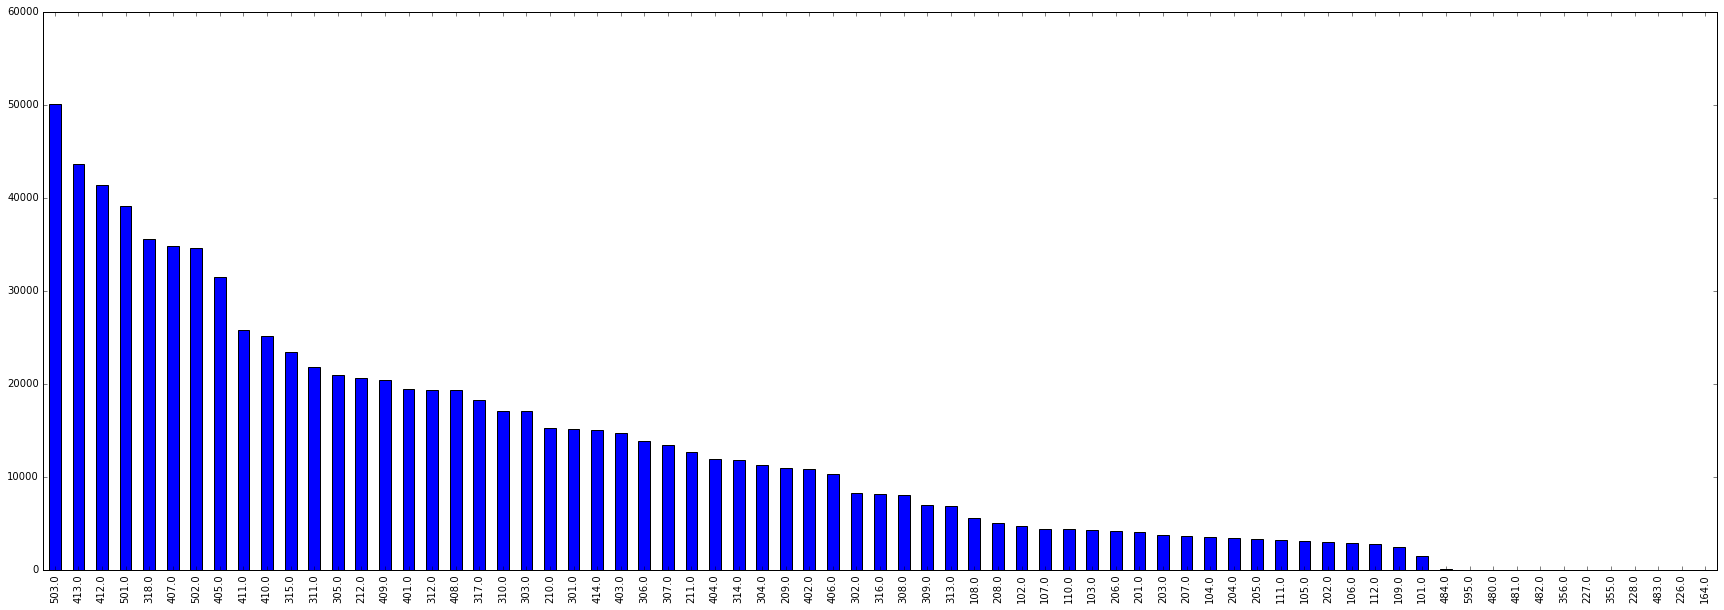

In [25]:
pluto['CD'].value_counts().plot(kind='bar', figsize=(30, 10))

In [26]:
pluto['PLUTOMapID'].value_counts()

1.0    856997
2.0      1798
3.0       460
4.0       204
5.0         4
Name: PLUTOMapID, dtype: int64

In [ ]:
# Do a regex search to extract all of the numbers in the addresses in the dataset.
pluto['Address'].map()